# <span style="color:darkblue;">[LDATS2350] - DATA MINING</span>

### <span style="color:darkred;">Python12 - Classification Decision Tree</span>

**Prof. Robin Van Oirbeek**  

<br/>

**<span style="color:darkgreen;">Guillaume Deside</span>** (<span style="color:gray;">guillaume.deside@uclouvain.be</span>)

---

## **🌳 What is a Decision Tree?**
A **Decision Tree** is a supervised learning algorithm used for classification and regression tasks. It **splits** the dataset into smaller subsets based on feature conditions, forming a tree-like structure.

---

## **🔹 Why Use Decision Trees?**
✅ **Easy to Understand & Interpret** – Mimics human decision-making.  
✅ **No Need for Feature Scaling** – Works with raw data.  
✅ **Handles Both Numerical & Categorical Data** – Versatile for different types of datasets.  
✅ **Non-Linear Relationships** – Captures complex decision boundaries.  
✅ **Feature Importance** – Identifies the most significant features in classification.  

---

## **📌 Key Components of a Decision Tree**
1. **Root Node** – The starting point containing the entire dataset.
2. **Decision Nodes** – Intermediate nodes that split data based on a feature.
3. **Leaf Nodes** – Terminal nodes that provide the final classification.
4. **Splitting Criteria** – Based on:
   - **Gini Impurity**: Measures impurity of a split.
   - **Entropy (Information Gain)**: Measures disorder in the dataset.

---

## **🔹 How Does a Decision Tree Work?**
1. **Find the Best Feature to Split** – The algorithm selects the most important feature using **Gini Impurity** or **Entropy**.
2. **Recursive Splitting** – The process repeats until a stopping criterion is met (e.g., maximum depth or minimum samples per leaf).
3. **Assign Class Labels** – The final leaf nodes contain the class prediction.

---

## **📌 Tuning Hyperparameters**
You can adjust hyperparameters to optimize the decision tree:
- **`max_depth`**: Limits the depth of the tree to prevent overfitting.
- **`min_samples_split`**: Minimum samples required to split an internal node.
- **`min_samples_leaf`**: Minimum samples required in a leaf node.
- **`criterion`**: `"gini"` (default) or `"entropy"` for split calculation.

---

## **🛠 Pros & Cons of Decision Trees**
### ✅ **Advantages**
✔️ Simple & interpretable  
✔️ Requires little data preprocessing  
✔️ Works with both numerical & categorical data  
✔️ Feature selection is built-in  

### ❌ **Disadvantages**
⚠️ **Prone to Overfitting** – Too deep trees memorize the training data.  
⚠️ **Sensitive to Noisy Data** – Small changes in data can lead to different splits.  
⚠️ **Not Always the Best Model** – Sometimes, ensemble methods like **Random Forests** perform better.  

---

## **🌲 Decision Trees in Action**
Here's a **Decision Tree visualization** to illustrate how it works:

![Decision Tree Example](https://camo.githubusercontent.com/83c3d5caa8e42191bef159b4514a8e207e835c6e95530caa40bf75d14222aa27/68747470733a2f2f7777772e6b646e7567676574732e636f6d2f77702d636f6e74656e742f75706c6f6164732f736f6369616c636f70732d747265652e6a7067)


# Data Import

In [6]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

Class Distribution:
 target
0    500
1    268
Name: count, dtype: int64


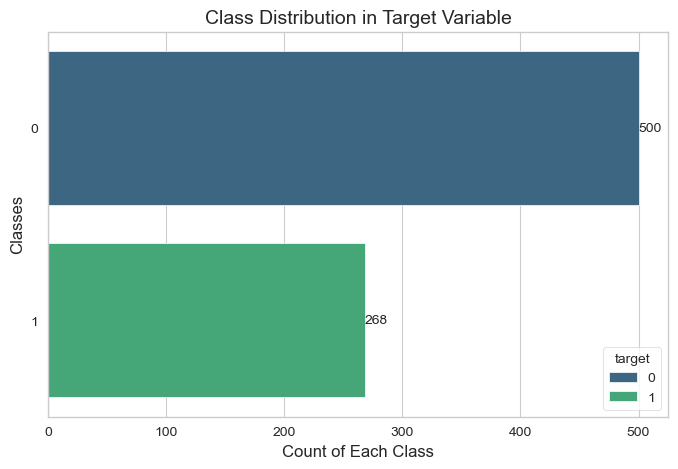

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display class distribution
class_counts = df['target'].value_counts()
print("Class Distribution:\n", class_counts)

# Set visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Plot class distribution
ax = sns.countplot(y=df['target'], data=df, palette="viridis",hue =df['target'] )

# Improve plot readability
plt.xlabel("Count of Each Class", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.title("Class Distribution in Target Variable", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

# Show the plot
plt.show()


In [19]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]


from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=None, #preserve target proportions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


# The Decision Tree Model

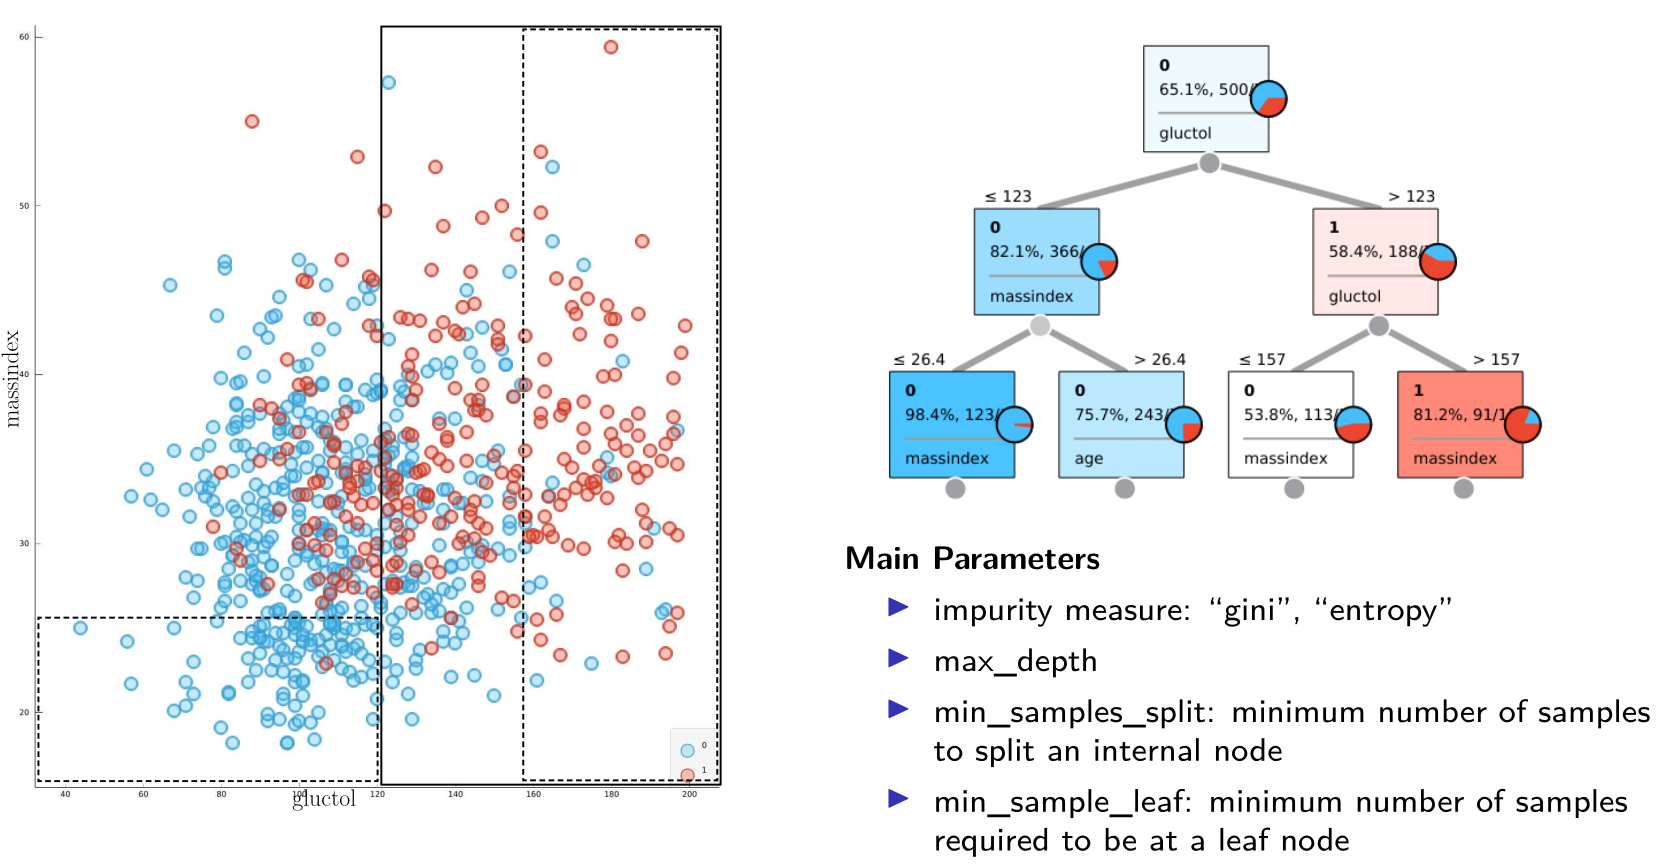

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[109  34]
 [ 32  56]]


<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise: Hyperparameter Tuning for Decision Tree Classifier** 🌳🔍

#### **Objective**
In this exercise, you will **train and optimize** a **Decision Tree Classifier** using **GridSearchCV** to find the best hyperparameters.

---

### **Step 1: Understanding the Decision Tree & Hyperparameters**
We will tune the following hyperparameters:

📌 **`criterion`**: The function to measure the quality of a split.  
   - Options: `"entropy"` (Information Gain) or `"gini"` (Gini Impurity).  
📌 **`max_depth`**: The maximum depth of the tree.  
   - Options: `[3, 5, 10, 50]`.  
📌 **`min_samples_split`**: The minimum number of samples required to split an internal node.  
   - Options: `[5, 10]`.  
📌 **`min_samples_leaf`**: The minimum number of samples required in a leaf node.  
   - Options: `[2, 4]`.  

---

### **Step 2: Implement the Decision Tree with GridSearchCV**
Using the given **hyperparameter dictionary**, train a **DecisionTreeClassifier** on a dataset.

#### **📌 Tasks**
1️⃣ Define the **DecisionTreeClassifier**.  
2️⃣ Use **GridSearchCV** to **find the best parameters**.  
3️⃣ Train the model on the training set (`X_train`, `y_train`).  
4️⃣ **Evaluate** the best model on the test set (`X_test`, `y_test`).  
5️⃣ Print the **best parameters** and **F1-scores** for train and test sets.  


</div>

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Step 1: Define the classifier
classifier = DecisionTreeClassifier()

# Step 2: Define the parameter grid
parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 50],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Step 3: Define GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring='f1', verbose=10, n_jobs=-1)

# Step 4: Train the model using GridSearchCV
gs.fit(X_train, y_train)

# Step 5: Retrieve the best model and make predictions
print('*** GRIDSEARCH RESULTS ***')
best_model = gs.best_estimator_
print("Best parameters:", gs.best_params_)

# Predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Step 6: Evaluate Performance
print("\n*** RESULTS ON TRAIN SET ***")
print("F1 Score (Train):", metrics.f1_score(y_train, y_pred_train))

print("\n*** RESULTS ON TEST SET ***")
print("F1 Score (Test):", metrics.f1_score(y_test, y_pred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 4/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=10
[CV 1/3; 1/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5
[CV 3/3; 3/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5
[CV 1/3; 3/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5
[CV 3/3; 1/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5
[CV 3/3; 2/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10
[CV 2/3; 1/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5
[CV 2/3; 2/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10
[CV 2/3; 3/32] START criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5
[CV 1/3; 1/32] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5;, score=

## **Plotting the Decision Tree 🌳**  

### **Why Can We Plot a Decision Tree?**  
Unlike other machine learning models (e.g., neural networks or ensemble methods), **Decision Trees** are inherently interpretable and can be **visualized** because:

1. **Tree Structure Representation** 🌲  
   - Decision trees use a hierarchical structure, where **each internal node represents a decision based on a feature**.
   - The tree splits the data at each node based on conditions (e.g., `age > 30`), making it easy to follow.

2. **Human Interpretability** 🧐  
   - Decision trees mimic human decision-making processes and can be **easily understood** even by non-experts.
   - Each leaf node represents a final classification (or prediction), while the path to each leaf **shows the decision-making process**.

3. **Graphical Representation** 🎨  
   - Since a decision tree consists of **nodes, branches, and leaves**, it can be represented as a **flowchart or tree diagram**.
   - The `graphviz` library allows us to **convert this structure into a graphical format** (`.dot` file → `.png` image).

4. **Feature Importance and Splitting Criteria** 📊  
   - Visualization helps understand **which features contribute the most** to the classification.
   - Each split is based on a **criterion like Gini Impurity or Information Gain**, making it clear how the tree makes decisions.

### **How Do We Plot the Decision Tree?**
We can visualize the tree using:
- `graphviz` (for detailed visualization with color-filled nodes)
- `sklearn.tree.plot_tree()` (for a quick in-notebook representation)

---

### **When Should You Use Decision Tree Visualization?**
✅ **Model Interpretation** – Helps understand how the model makes decisions.  
✅ **Feature Importance** – Identifies key variables driving the classification.  
✅ **Debugging & Pruning** – Detects unnecessary splits and overfitting.  
✅ **Communicating Insights** – Explains the model to stakeholders in a visually appealing way.

🛑 **Limitations:**  
🚧 If the tree is **too deep**, visualization may become **complicated** and unreadable. Consider **pruning the tree** or **limiting the depth**.

---

### **🎯 Key Takeaway**
A decision tree is **one of the few machine learning models that can be visualized**, making it a great choice for **interpretable AI**. Its graphical representation allows us to **understand feature importance, decision-making, and model performance** in a human-readable way. 🚀

In [40]:
X_train.columns.tolist()

['timespreg',
 'gluctol',
 'diaspb',
 'triceps',
 'insulin',
 'massindex',
 'pedigree',
 'age']

In [42]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)

|--- gluctol <= 123.50
|   |--- massindex <= 26.45
|   |   |--- pedigree <= 0.68
|   |   |   |--- class: 0
|   |   |--- pedigree >  0.68
|   |   |   |--- pedigree <= 0.78
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.78
|   |   |   |   |--- class: 0
|   |--- massindex >  26.45
|   |   |--- age <= 30.50
|   |   |   |--- pedigree <= 0.69
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.69
|   |   |   |   |--- class: 0
|   |   |--- age >  30.50
|   |   |   |--- gluctol <= 94.50
|   |   |   |   |--- class: 0
|   |   |   |--- gluctol >  94.50
|   |   |   |   |--- class: 1
|--- gluctol >  123.50
|   |--- gluctol <= 166.50
|   |   |--- massindex <= 28.85
|   |   |   |--- age <= 26.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  26.50
|   |   |   |   |--- class: 0
|   |   |--- massindex >  28.85
|   |   |   |--- age <= 30.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  30.50
|   |   |   |   |--- class: 1
|   |--- gluctol >  166.50
|   |   |--- massi

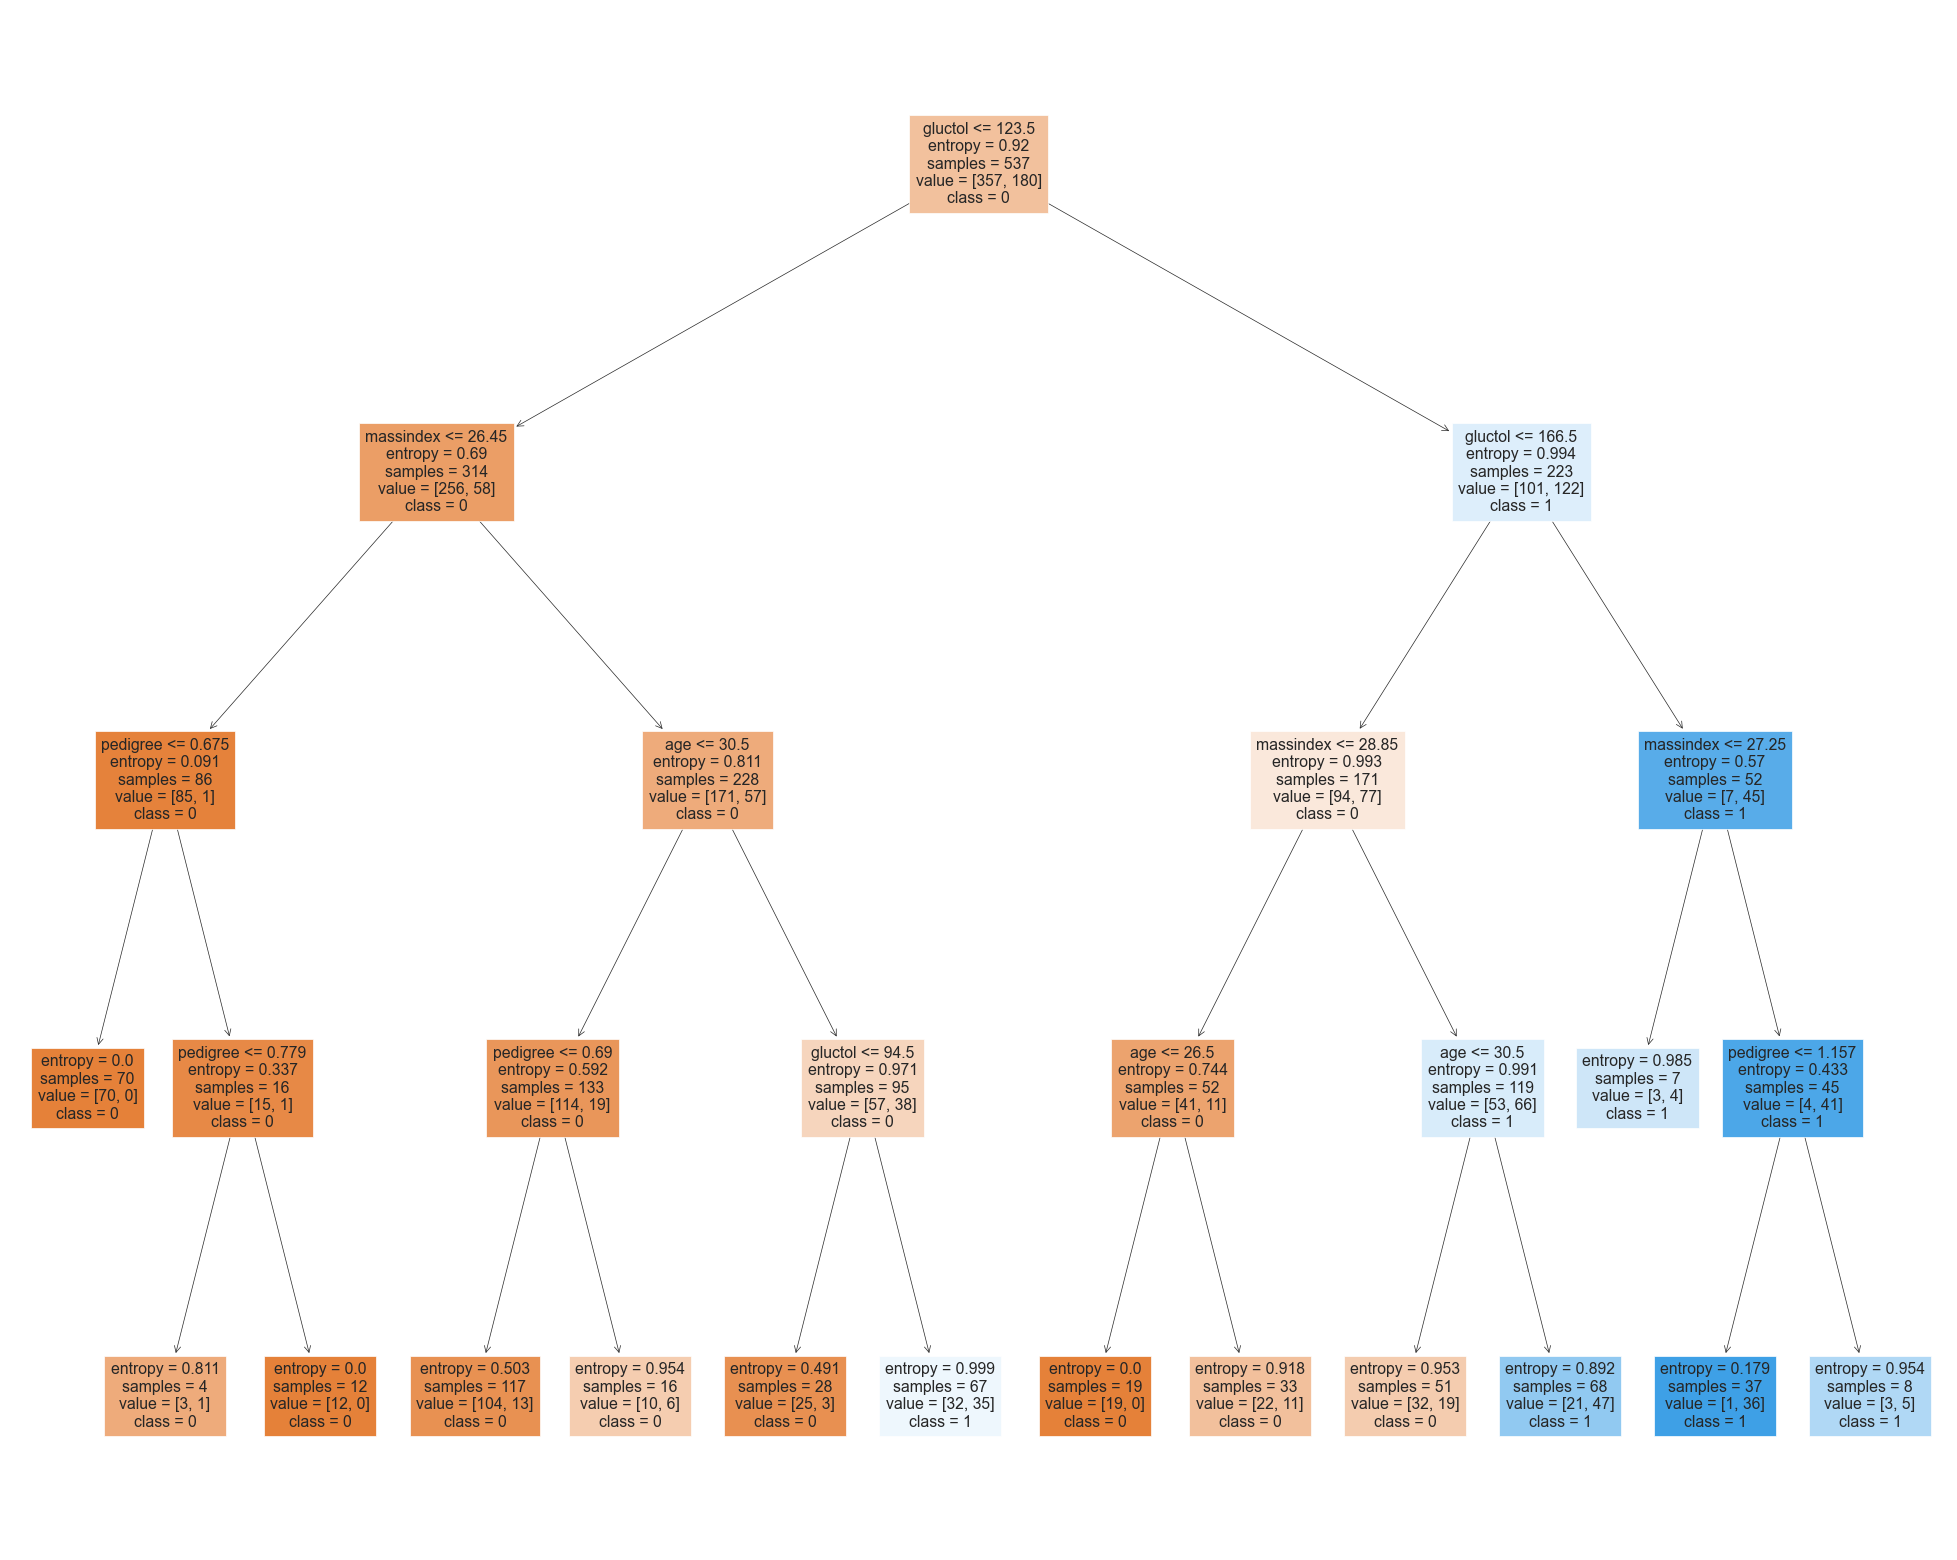

In [50]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_test.columns.tolist(),  
                   class_names=['0','1'],
                   filled=True)

plt.show()

In [52]:
# Import necessary libraries
from sklearn.tree import export_graphviz
from IPython.display import Image
import os

# Define the output file for the decision tree visualization
output_file = "decision_tree.dot"

# Step 1: Export the decision tree model as a .dot file
export_graphviz(
    model, 
    out_file=output_file,  # Save the output as a .dot file
    feature_names=X_test.columns.tolist(),  # Use column names as feature labels
    class_names=['0', '1'],  # Define class labels
    filled=True,  # Fill nodes with colors based on the majority class
    rounded=True,  # Make nodes rounded for better visualization
    special_characters=True  # Enable special characters
)

# Step 2: Convert .dot file to .png using Graphviz
png_output = "decision_tree.png"

# Check if Graphviz is installed and execute conversion
if os.system(f"dot -Tpng {output_file} -o {png_output} -Gdpi=600") == 0:
    print(f"Decision tree visualization saved as: {png_output}")
else:
    print("Error: Graphviz is not installed or the command failed.")

# Step 3: Display the generated decision tree image
if os.path.exists(png_output):
    display(Image(filename=png_output))
else:
    print("Error: Decision tree image not found.")


Decision tree visualization saved as: decision_tree.png
